In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pickle

# Path to your pickle file
file_path = "results_norman_prelim.pkl"

# Open and load the pickle file
with open(file_path, "rb") as f:  # "rb" means read binary
    data = pickle.load(f)

print(data)


ModuleNotFoundError: No module named 'numpy._core'

In [ ]:
np.__version__

In [ ]:
df_all = pd.read_pickle("results_norman_prelim.pkl")

#### Sanity check: for each random seed (= split) contains the same ood conditions for all models

In [ ]:
for seed in df_all.seed.unique():
    a = df_all.loc[(df_all.seed == seed) & (df_all.model == "gears")].condition
    b = df_all.loc[(df_all.seed == seed) & (df_all.model == "biolord")].condition
    c = np.intersect1d(
        df_all.loc[(df_all.seed == seed) & (df_all.model == "gears")].condition,
        df_all.loc[(df_all.seed == seed) & (df_all.model == "biolord")].condition
    )
    assert len(a) == len(b) == len(c)
    
    a = df_all.loc[(df_all.seed == seed) & (df_all.model == "gears")].condition
    b = df_all.loc[(df_all.seed == seed) & (df_all.model == "cellflow")].condition
    c = np.intersect1d(
        df_all.loc[(df_all.seed == seed) & (df_all.model == "gears")].condition,
        df_all.loc[(df_all.seed == seed) & (df_all.model == "cellflow")].condition
    )
    assert len(a) == len(b) == len(c)
    
    a = df_all.loc[(df_all.seed == seed) & (df_all.model == "gears")].condition
    b = df_all.loc[(df_all.seed == seed) & (df_all.model == "identity")].condition
    c = np.intersect1d(
        df_all.loc[(df_all.seed == seed) & (df_all.model == "gears")].condition,
        df_all.loc[(df_all.seed == seed) & (df_all.model == "identity")].condition
    )
    assert len(a) == len(b) == len(c)
print("All assertions passed.")

#### Sanity check: there should be 5 splits per subgroup for each model (except for the additive model which can only be applied to the double_seen_2 subgroup)

In [4]:
# sanity check if all results are there
df_all.groupby(["model", "subgroup"]).seed.nunique()

model     subgroup     
additive  double_seen_2    5
biolord   double_seen_0    5
          double_seen_1    5
          double_seen_2    5
          single           5
cellflow  double_seen_0    5
          double_seen_1    5
          double_seen_2    5
          single           5
gears     double_seen_0    5
          double_seen_1    5
          double_seen_2    5
          single           5
identity  double_seen_0    5
          double_seen_1    5
          double_seen_2    5
          single           5
Name: seed, dtype: int64

##### Compute mean per model x seed x subgroup combination

In [5]:
df_means = (
    df_all.drop(columns=["condition"])  # Drop 'condition' column
    .groupby(["model", "seed", "subgroup"], as_index=False)
    .mean()  # Take the mean of the remaining columns
)
df_means

,model,seed,subgroup,encoded_ood_r_squared,encoded_ood_e_distance,encoded_ood_mmd,decoded_ood_r_squared,decoded_ood_e_distance,decoded_ood_mmd,deg_ood_r_squared,...,deg_ood_mmd,deg_ood_sinkhorn_div_1,deg_ood_sinkhorn_div_10,deg_ood_sinkhorn_div_100,encoded_ood_sinkhorn_div_1,encoded_ood_sinkhorn_div_10,encoded_ood_sinkhorn_div_100,decoded_ood_sinkhorn_div_1,decoded_ood_sinkhorn_div_10,decoded_ood_sinkhorn_div_100
0,additive,1,double_seen_2,0.560998,8.057626,0.027758,0.988701,18.575498,0.019135,0.970823,...,0.022227,32.740985,11.421825,2.042842,34.887831,23.809586,7.418163,NaN,NaN,NaN
1,additive,2,double_seen_2,0.275676,9.761873,0.035112,0.988791,18.192644,0.025828,0.976821,...,0.026380,28.569214,9.924039,1.852156,35.724686,24.994449,8.572648,NaN,NaN,NaN
2,additive,3,double_seen_2,0.761788,11.920620,0.032241,0.983400,28.028734,0.015540,0.853524,...,0.065673,29.743914,10.864480,2.228007,41.440274,29.518953,10.218161,NaN,NaN,NaN
3,additive,4,double_seen_2,0.727063,6.027932,0.028339,0.989420,17.392286,0.020585,0.982001,...,0.023983,25.613198,7.816247,1.631908,35.670165,24.272815,6.724385,NaN,NaN,NaN
4,additive,5,double_seen_2,-0.044512,7.899124,0.033417,0.988753,18.510676,0.023430,0.976508,...,0.025786,27.613577,9.025657,1.649307,35.613591,24.598033,7.577783,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,identity,4,single,-0.914947,18.284895,0.039571,0.981706,29.274192,0.013445,0.856047,...,0.060825,15.448985,8.062129,7.062432,19.773949,14.158397,9.835557,308.358404,283.377070,40.259045
81,identity,5,double_seen_0,-0.668075,183.704483,0.180187,0.885102,198.540474,0.034557,0.389407,...,0.162161,45.288563,34.234900,29.024766,132.253024,124.828691,106.128642,535.776418,514.547394,233.175323
82,identity,5,double_seen_1,-0.922137,72.195499,0.105025,0.946042,90.471268,0.025699,-17.640749,...,0.113166,32.201691,21.905284,19.258313,55.853484,49.090171,39.622138,386.862918,363.952053,105.894232
83,identity,5,double_seen_2,-1.195880,55.079277,0.086804,0.953665,76.361018,0.022312,0.734723,...,0.094230,30.345091,19.339638,17.325474,43.696524,37.004583,29.472097,373.215373,349.508651,83.550688


In [6]:
# some deg conditions have negative r2 results
df_all.loc[df_all.deg_ood_r_squared < 0, ["subgroup", "condition", "seed", "model", "deg_ood_r_squared"]].sort_values(["condition", "seed", "model"])

# df_all = df_all.loc[df_all.condition != "C3orf72+FOXL2"]

,subgroup,condition,seed,model,deg_ood_r_squared
16,double_seen_1,BCL2L11+BAK1,1,biolord,-0.471955
122,double_seen_1,BCL2L11+BAK1,2,biolord,-0.665450
235,double_seen_2,BCL2L11+BAK1,3,biolord,-0.481846
1782,double_seen_0,C3orf72+FOXL2,1,cellflow,-1926.103271
599,double_seen_0,C3orf72+FOXL2,1,gears,-10204.254883
1180,double_seen_0,C3orf72+FOXL2,1,identity,-1024.455688
1896,double_seen_1,C3orf72+FOXL2,2,cellflow,-1562.882935
727,double_seen_1,C3orf72+FOXL2,2,gears,-20728.080078
1308,double_seen_1,C3orf72+FOXL2,2,identity,-1024.455688
2071,double_seen_1,C3orf72+FOXL2,4,cellflow,-2300.159424


In [7]:
SUBGROUP_ORDER = ["single", "double_seen_2", "double_seen_1", "double_seen_0"]
HUE_ORDER = ["cellflow", "gears", "biolord", "identity", "additive",]

##### Mean performance across splits per subgroup

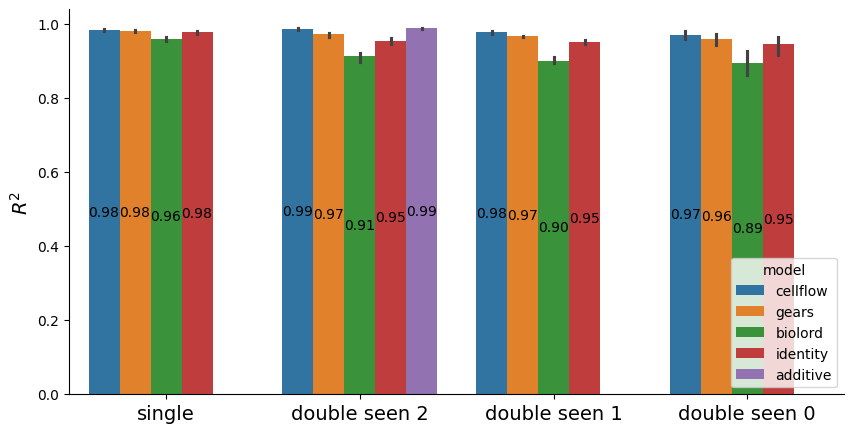

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.barplot(
    data = df_means,
    x = "subgroup",
    y = "decoded_ood_r_squared",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel(r"$R^2$", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

[ax.bar_label(ax.containers[k], fmt='%.2f', label_type='center') for k in range(len(ax.containers))]
plt.show()

##### $R^2$ on decoded genes

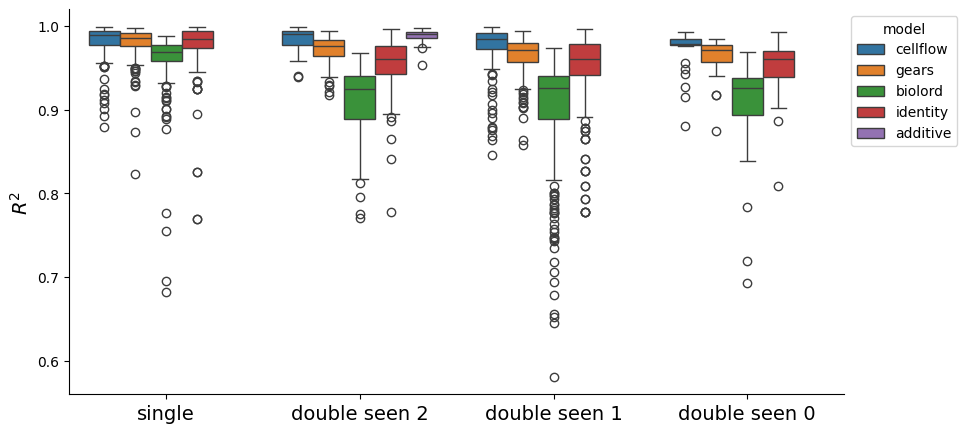

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.boxplot(
    df_all,
    x = "subgroup",
    y = "decoded_ood_r_squared",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel(r"$R^2$", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### $R^2$ in latent space

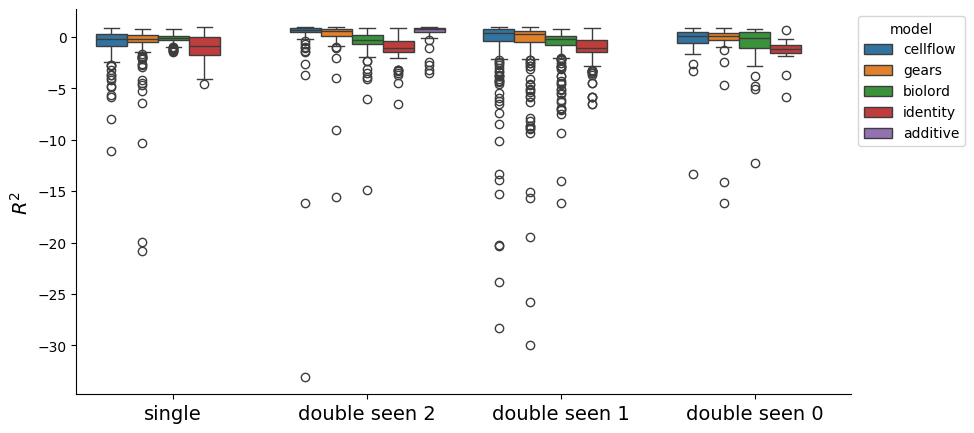

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.boxplot(
    df_all,
    x = "subgroup",
    y = "encoded_ood_r_squared",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel(r"$R^2$", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### $R^2$ on DEGs

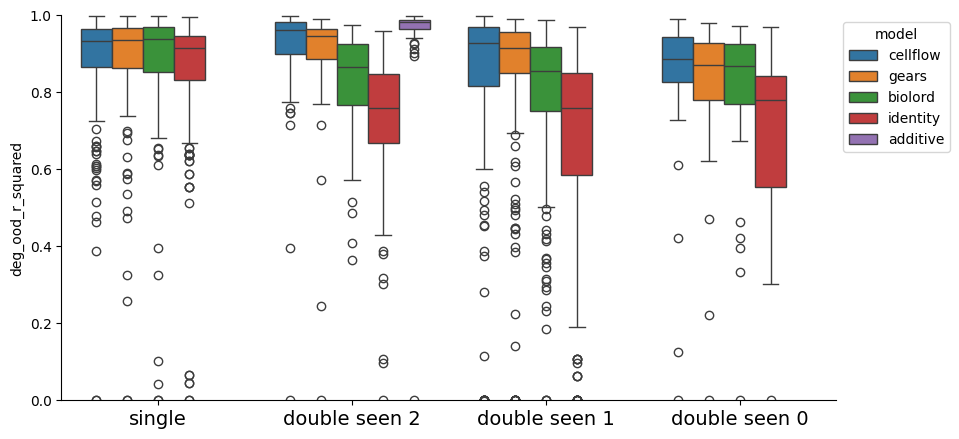

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.boxplot(
    df_all,
    x = "subgroup",
    y = "deg_ood_r_squared",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim([0, 1])
plt.show()

#### Energy distance, decoded gene space

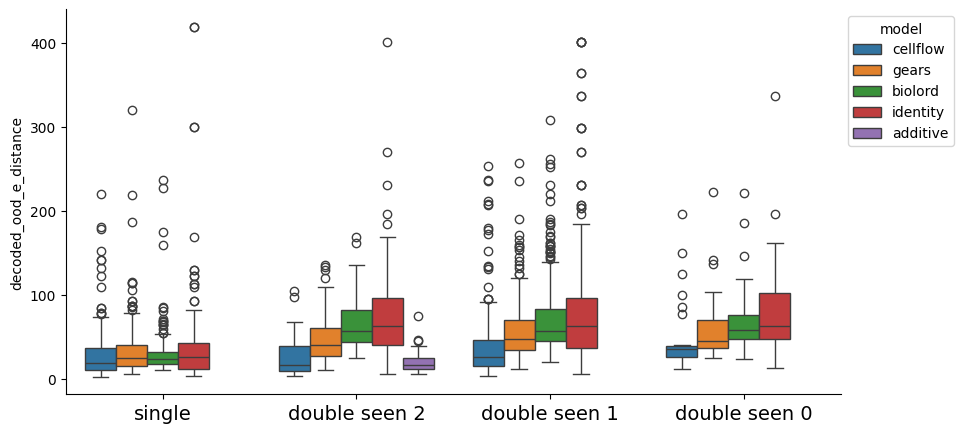

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.boxplot(
    df_all,
    x = "subgroup",
    y = "decoded_ood_e_distance",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### Energy distance, latent space

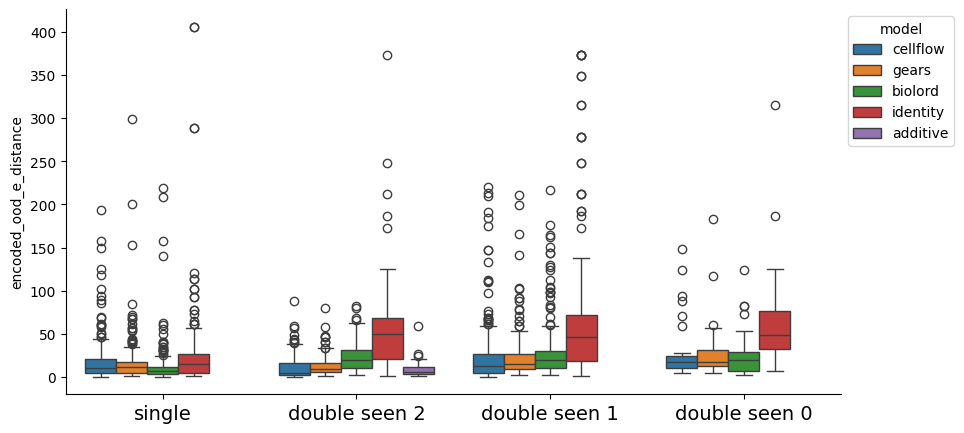

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.boxplot(
    df_all,
    x = "subgroup",
    y = "encoded_ood_e_distance",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### Energy distance on DEGs

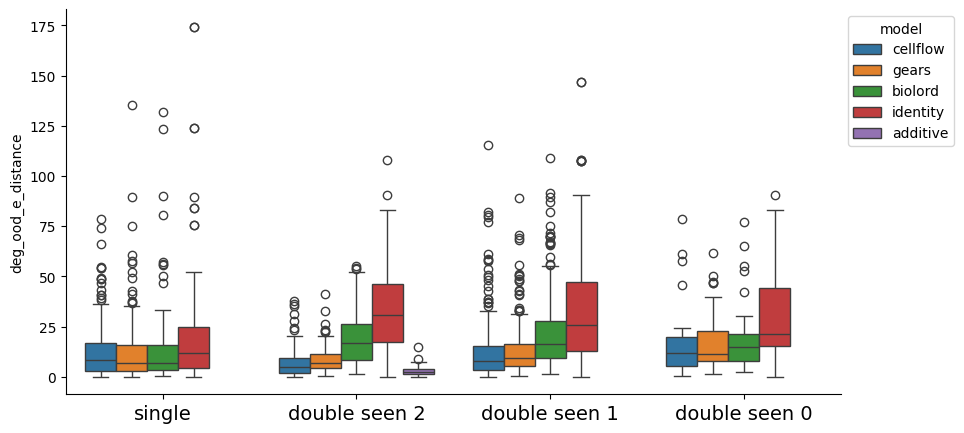

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.boxplot(
    df_all,
    x = "subgroup",
    y = "deg_ood_e_distance",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

####  MMD decoded gene space

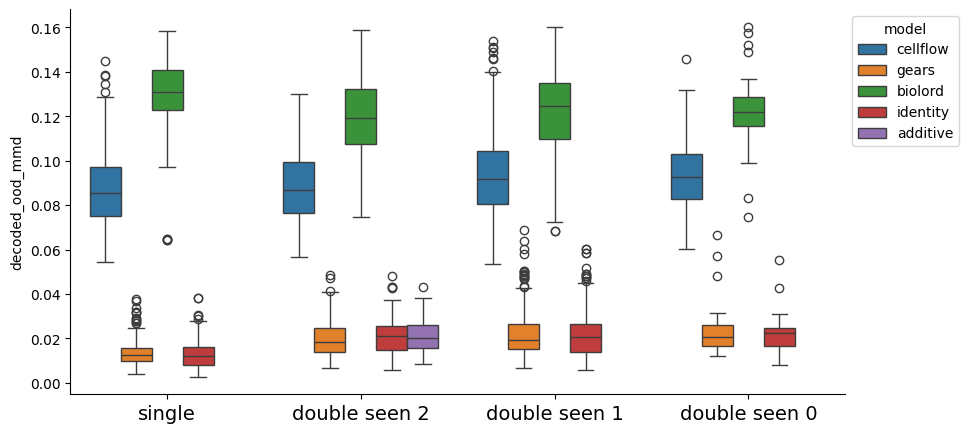

In [15]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.boxplot(
    df_all,
    x = "subgroup",
    y = "decoded_ood_mmd",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

####  MMD latent space

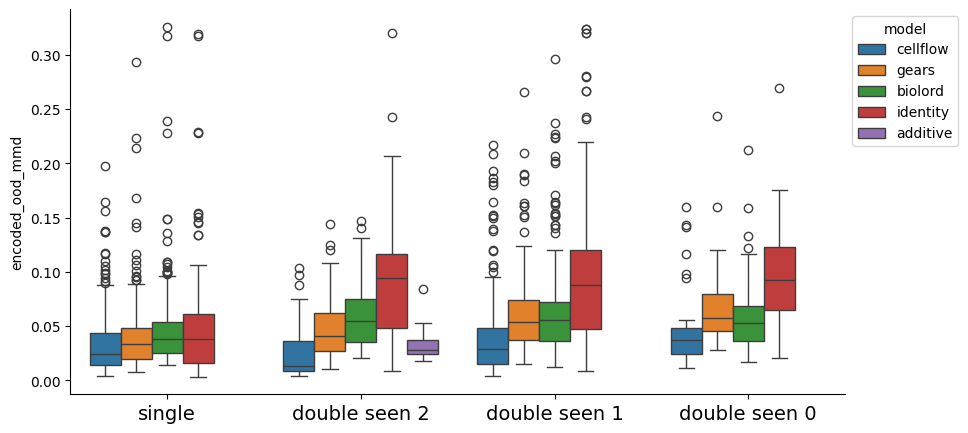

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.boxplot(
    df_all,
    x = "subgroup",
    y = "encoded_ood_mmd",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### MMD on DEGs

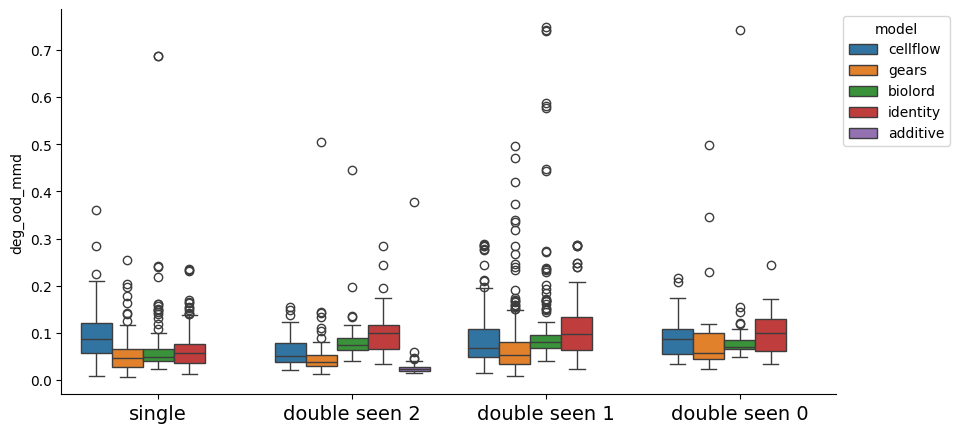

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.boxplot(
    df_all,
    x = "subgroup",
    y = "deg_ood_mmd",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### Sinkhorn div on DEGs

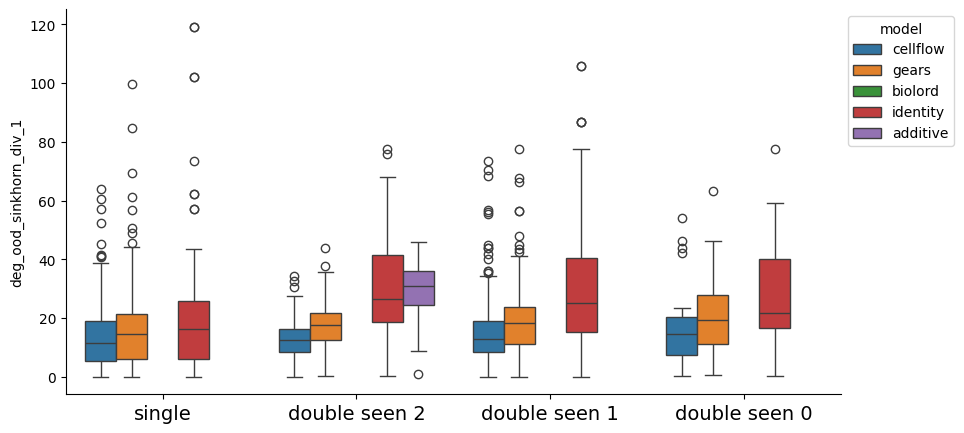

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.boxplot(
    df_all,
    x = "subgroup",
    y = "deg_ood_sinkhorn_div_1",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#### Sinkhorn divergence on latent space

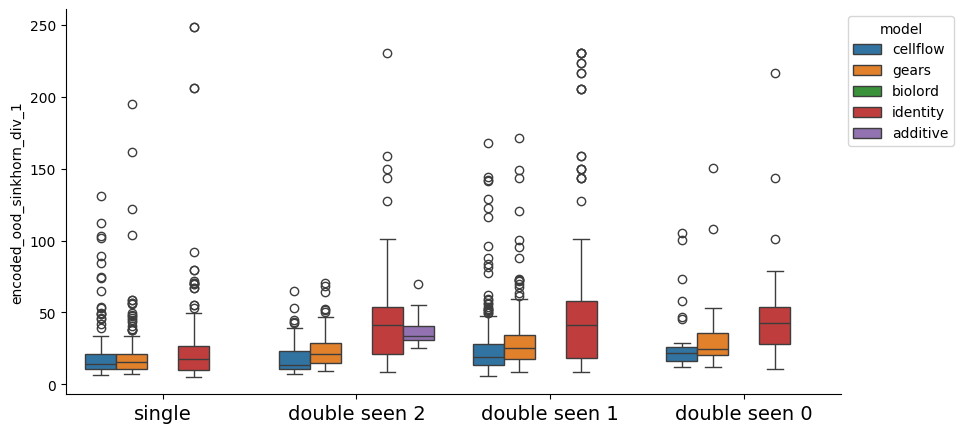

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax = sns.boxplot(
    df_all,
    x = "subgroup",
    y = "encoded_ood_sinkhorn_div_1",
    hue="model",
    order=SUBGROUP_ORDER,
    hue_order=HUE_ORDER,
)
plt.xlabel("")
plt.xticks([0, 1, 2, 3], ["single", "double seen 2", "double seen 1", "double seen 0"], fontsize = 14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()